In [ ]:
import pandas as pd # data from for the data
import numpy as np # for math and arrays
import  seaborn as sns # for plotting
import matplotlib.pyplot as plt # for plotting data and creating different charts
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization,Activation
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.optimizers import Adam
print(f"Tensorflow version: {tf.version.VERSION}")


Tensorflow version: 2.8.2


In [ ]:
data = pd.read_csv('/content/training_set.csv')
data.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
0,0,0.00,0.00,4.34,0.00,0.00,0.00,0.00,0.00,0.0,...,0.0,0.000,0.0,1.342,0.000,0.000,1.200,2,12,0
1,1,0.00,0.56,0.56,0.00,1.12,0.56,2.25,0.00,0.0,...,0.0,0.083,0.0,0.503,0.000,0.083,16.304,148,375,1
2,2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,...,0.0,0.000,0.0,0.000,0.000,0.000,1.000,1,5,0
3,3,0.64,0.00,0.64,0.00,1.93,0.00,0.00,0.00,0.0,...,0.0,0.000,0.0,0.462,0.370,0.000,2.440,22,122,1
4,4,0.58,0.00,0.00,35.46,0.58,0.00,0.58,0.58,0.0,...,0.0,0.000,0.0,0.239,0.239,0.000,3.338,123,207,1


In [ ]:
data = pd.read_csv('/content/training_set.csv')
data.rename(columns={'Y':'Class'},inplace='True')
data

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X49,X50,X51,X52,X53,X54,X55,X56,X57,Class
0,0,0.00,0.00,4.34,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.0,1.342,0.000,0.000,1.200,2,12,0
1,1,0.00,0.56,0.56,0.00,1.12,0.56,2.25,0.00,0.00,...,0.0,0.083,0.0,0.503,0.000,0.083,16.304,148,375,1
2,2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.0,0.000,0.000,0.000,1.000,1,5,0
3,3,0.64,0.00,0.64,0.00,1.93,0.00,0.00,0.00,0.00,...,0.0,0.000,0.0,0.462,0.370,0.000,2.440,22,122,1
4,4,0.58,0.00,0.00,35.46,0.58,0.00,0.58,0.58,0.00,...,0.0,0.000,0.0,0.239,0.239,0.000,3.338,123,207,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3905,3905,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.0,0.000,0.000,0.000,1.714,4,12,0
3906,3906,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.0,0.000,0.000,0.000,2.000,3,4,0
3907,3907,0.12,0.00,0.12,0.00,0.00,0.25,0.00,0.00,0.00,...,0.0,0.093,0.0,0.023,0.000,0.000,1.247,5,131,0
3908,3908,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.12,0.00,...,0.0,0.198,0.0,0.198,0.198,0.000,3.857,25,81,1


In [ ]:
data.shape # shape of dataset

(3910, 59)

In [ ]:
data.isnull().sum() # check any null values

Unnamed: 0    0
X1            0
X2            0
X3            0
X4            0
X5            0
X6            0
X7            0
X8            0
X9            0
X10           0
X11           0
X12           0
X13           0
X14           0
X15           0
X16           0
X17           0
X18           0
X19           0
X20           0
X21           0
X22           0
X23           0
X24           0
X25           0
X26           0
X27           0
X28           0
X29           0
X30           0
X31           0
X32           0
X33           0
X34           0
X35           0
X36           0
X37           0
X38           0
X39           0
X40           0
X41           0
X42           0
X43           0
X44           0
X45           0
X46           0
X47           0
X48           0
X49           0
X50           0
X51           0
X52           0
X53           0
X54           0
X55           0
X56           0
X57           0
Class         0
dtype: int64

In [ ]:
data.info() # summary information on dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3910 entries, 0 to 3909
Data columns (total 59 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  3910 non-null   int64  
 1   X1          3910 non-null   float64
 2   X2          3910 non-null   float64
 3   X3          3910 non-null   float64
 4   X4          3910 non-null   float64
 5   X5          3910 non-null   float64
 6   X6          3910 non-null   float64
 7   X7          3910 non-null   float64
 8   X8          3910 non-null   float64
 9   X9          3910 non-null   float64
 10  X10         3910 non-null   float64
 11  X11         3910 non-null   float64
 12  X12         3910 non-null   float64
 13  X13         3910 non-null   float64
 14  X14         3910 non-null   float64
 15  X15         3910 non-null   float64
 16  X16         3910 non-null   float64
 17  X17         3910 non-null   float64
 18  X18         3910 non-null   float64
 19  X19         3910 non-null  

In [ ]:
data.describe()  # Statistics of dataset

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X49,X50,X51,X52,X53,X54,X55,X56,X57,Class
count,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,...,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000
mean,1954.500000,0.102990,0.206419,0.284419,0.062074,0.311309,0.095974,0.112320,0.106041,0.091146,...,0.037493,0.139252,0.015876,0.272971,0.077820,0.043828,5.047150,52.338107,283.059079,0.392327
std,1128.864105,0.296322,1.253828,0.504352,1.369361,0.656195,0.261455,0.389516,0.398694,0.271417,...,0.235054,0.276309,0.083600,0.858634,0.256991,0.452862,31.397035,204.445218,578.339858,0.488331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,977.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.580750,6.000000,35.000000,0.000000
50%,1954.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.066000,0.000000,0.000000,0.000000,0.000000,2.263500,15.000000,94.000000,0.000000
75%,2931.750000,0.000000,0.000000,0.430000,0.000000,0.387500,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.188000,0.000000,0.317250,0.054000,0.000000,3.714000,43.000000,264.000000,1.000000
max,3909.000000,4.340000,14.280000,4.540000,42.810000,9.090000,3.570000,7.270000,11.110000,3.230000,...,4.385000,9.752000,2.777000,32.478000,6.003000,19.829000,1102.500000,9989.000000,10062.000000,1.000000


Balance the Dataset

In [ ]:
non_class_dataset = data[data['Class']==0]
class_dataset = data[data['Class']==1]

In [ ]:
non_class_dataset = non_class_dataset.sample(class_dataset.shape[0])
non_class_dataset.shape

(1534, 59)

In [ ]:
data = class_dataset.append(non_class_dataset, ignore_index=True)
data

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X49,X50,X51,X52,X53,X54,X55,X56,X57,Class
0,1,0.00,0.56,0.56,0.00,1.12,0.56,2.25,0.00,0.00,...,0.000,0.083,0.0,0.503,0.000,0.083,16.304,148,375,1
1,3,0.64,0.00,0.64,0.00,1.93,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.462,0.370,0.000,2.440,22,122,1
2,4,0.58,0.00,0.00,35.46,0.58,0.00,0.58,0.58,0.00,...,0.000,0.000,0.0,0.239,0.239,0.000,3.338,123,207,1
3,6,0.14,0.14,0.29,0.00,0.00,0.00,0.00,0.00,1.02,...,0.000,0.204,0.0,0.153,0.153,0.102,2.705,73,368,1
4,9,0.00,2.66,0.00,0.00,2.00,0.00,0.00,0.66,0.00,...,0.000,0.000,0.0,0.111,0.000,0.000,2.133,7,32,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3063,3876,2.27,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.000,0.000,0.000,1.200,3,12,0
3064,2229,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.060,0.0,0.302,0.000,0.000,1.562,14,100,0
3065,1252,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.000,0.000,0.000,1.428,3,10,0
3066,2760,0.00,0.00,0.00,0.00,0.13,0.00,0.00,0.55,0.00,...,0.071,0.143,0.0,0.000,0.053,0.000,2.662,22,418,0


In [ ]:
data['Class'].value_counts()  # checking the distribution of Target Varibale

1    1534
0    1534
Name: Class, dtype: int64

Separating the features and target

In [ ]:
X = data.drop('Class', axis = 1)
y = data['Class']

Split the dataset into Train and Test dataset into 80:20

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
X_train.shape, X_test.shape,y_train.shape,y_test.shape

((2454, 58), (614, 58), (2454,), (614,))

Split the trainning dataset into Train and Validation dataset

In [ ]:
X_train_new, X_val, y_train_new, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 0)

In [ ]:
X_train_new.shape,X_val.shape,X_test.shape

((1963, 58), (491, 58), (614, 58))

Standardize the data

In [ ]:
scaler = StandardScaler()
normed_X_train = scaler.fit_transform(X_train_new)
normed_X_test = scaler.transform(X_test)
normed_X_valid =  scaler.transform(X_val)

In [ ]:
y_train_label = y_train_new.to_numpy()
y_test = y_test.to_numpy()
y_val = y_val.to_numpy()

In [ ]:
X_train_new.shape, X_test.shape,X_val.shape

((1963, 58), (614, 58), (491, 58))

Build a Neural Network Model

In [ ]:
epochs = 100
model = Sequential()
model.add(Dense(32, input_shape = (normed_X_train.shape[1],)))    # Input layer => input_shape must be explicitly designated
#     model.add(Activation('relu')) # relu or sigmoid.
model.add(Dense(32,Activation('relu')))                         # Hidden layer 1 => only output dimension should be designated (output dimension = # of Neurons = 32)
    
    
model.add(Dense(64, Activation('relu')))                         # Hidden layer 2 => only output dimension should be designated (output dimension = # of Neurons = 64)
    
    
model.add(Dense(128, Activation('relu')))                         # Hidden layer 3 => only output dimension should be designated (output dimension = # of Neurons = 128)

    
model.add(Dense(1, activation='sigmoid'))                         # Output layer

In [ ]:
model.summary()  # summary of the model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                1888      
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 64)                2112      
                                                                 
 dense_3 (Dense)             (None, 128)               8320      
                                                                 
 dense_4 (Dense)             (None, 1)                 129       
                                                                 
Total params: 13,505
Trainable params: 13,505
Non-trainable params: 0
_________________________________________________________________


Training the model we built above

In [ ]:
model.compile(optimizer=Adam(lr=0.0001), loss = 'binary_crossentropy', metrics=['accuracy'])  # compiling the neural network  

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
history = model.fit(normed_X_train, y_train_label, epochs=epochs, validation_data=(normed_X_valid, y_val), verbose=1)

Epoch 1/100
62/62 [==============================] - 1s 6ms/step - loss: 0.6801 - accuracy: 0.6052 - val_loss: 0.6403 - val_accuracy: 0.7332
Epoch 2/100
62/62 [==============================] - 0s 4ms/step - loss: 0.6051 - accuracy: 0.7672 - val_loss: 0.5649 - val_accuracy: 0.8126
Epoch 3/100
62/62 [==============================] - 0s 4ms/step - loss: 0.5236 - accuracy: 0.8181 - val_loss: 0.4781 - val_accuracy: 0.8615
Epoch 4/100
62/62 [==============================] - 0s 3ms/step - loss: 0.4388 - accuracy: 0.8574 - val_loss: 0.4015 - val_accuracy: 0.8798
Epoch 5/100
62/62 [==============================] - 0s 3ms/step - loss: 0.3688 - accuracy: 0.8752 - val_loss: 0.3491 - val_accuracy: 0.8921
Epoch 6/100
62/62 [==============================] - 0s 4ms/step - loss: 0.3220 - accuracy: 0.8889 - val_loss: 0.3156 - val_accuracy: 0.9002
Epoch 7/100
62/62 [==============================] - 0s 4ms/step - loss: 0.2902 - accuracy: 0.8996 - val_loss: 0.2945 - val_accuracy: 0.9022
Epoch 8/100
6

In [ ]:
print('Summary of the results after each epoch: ')
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

Summary of the results after each epoch: 


,loss,accuracy,val_loss,val_accuracy,epoch
95,0.081175,0.977076,0.204468,0.942973,95
96,0.080003,0.978095,0.204079,0.940937,96
97,0.079388,0.978095,0.204317,0.940937,97
98,0.078365,0.978095,0.205432,0.940937,98
99,0.077872,0.978095,0.206676,0.940937,99


See how the training went by plotting the loss/Accuracy across epochs

In [ ]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

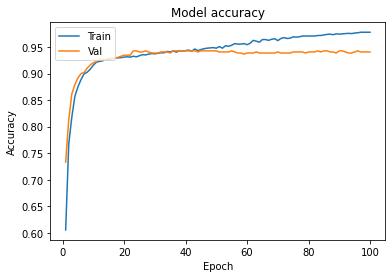

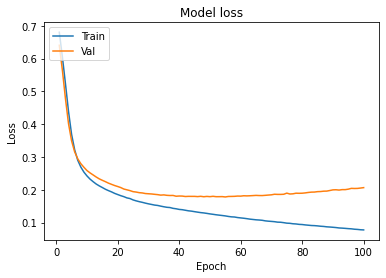

In [ ]:
plot_learningCurve(history, epochs)

Accuracy of the model on Train,Test and Validation data

In [ ]:
print('Train Split: ')
loss, accuracy = model.evaluate(normed_X_train, y_train_label, verbose=1)

print("Accuracy   : {:5.2f} ".format(accuracy))

Train Split: 
62/62 [==============================] - 0s 1ms/step - loss: 0.0755 - accuracy: 0.9791
Accuracy   :  0.98 


In [ ]:
print('Validation Split: ')
loss, accuracy =  model.evaluate(normed_X_valid, y_val, verbose=2)

print("Accuracy   : {:5.2f} ".format(accuracy))

Validation Split: 
16/16 - 0s - loss: 0.2067 - accuracy: 0.9409 - 35ms/epoch - 2ms/step
Accuracy   :  0.94 


In [ ]:
print('Test Split: ')
loss, accuracy =  model.evaluate(normed_X_test, y_test, verbose=2)

print("Accuracy   : {:5.2f} ".format(accuracy))

Test Split: 
20/20 - 0s - loss: 0.2752 - accuracy: 0.9251 - 52ms/epoch - 3ms/step
Accuracy   :  0.93 
